In [55]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Rupture

In [56]:
def generate_data_points(num_points):
    np.random.seed(42)
    X = np.linspace(0, num_points, num_points).reshape(-1, 1)
    return X

# 线性变点函数
def linear_changepoint(X):
    num_points = len(X)
    mid_point = num_points // 3
    Y = np.zeros_like(X)
    Y[:mid_point] = 0
    Y[mid_point:num_points - mid_point] = 0.1 * (X[mid_point:num_points - mid_point] - mid_point)
    Y[num_points - mid_point:] = 0.1 * (num_points - mid_point - X[num_points - mid_point:])
    Y += 0.0001 * np.random.randn(*X.shape)
    return Y

# 正弦变点函数
def sinusoidal_changepoint(X):
    num_points = len(X)
    mid_point = num_points // 3
    Y = np.zeros_like(X)
    Y[:mid_point] = 0
    Y[mid_point:num_points - mid_point] = np.sin((X[mid_point:num_points - mid_point] - mid_point) * 0.1 * np.pi)
    Y[num_points - mid_point:] = 0
    Y += 0.0001 * np.random.randn(*X.shape)
    return Y

# 阶跃变点函数
def step_changepoint(X):
    num_points = len(X)
    mid_point = num_points // 3
    Y = np.zeros_like(X)
    Y[:mid_point] = 0
    Y[mid_point:num_points - mid_point] = 1
    Y[num_points - mid_point:] = 0
    Y += 0.0001 * np.random.randn(*X.shape)
    return Y


# 多项式变点函数
def polynomial_changepoint(X):
    num_points = len(X)
    mid_point = num_points // 3
    Y = np.zeros_like(X)
    Y[:mid_point] = 0
    Y[mid_point:num_points - mid_point] = 0.001 * (X[mid_point:num_points - mid_point] - mid_point) ** 2
    Y[num_points - mid_point:] = 0
    Y += 0.0001 * np.random.randn(*X.shape)
    return Y


X = generate_data_points(63 * 3)
Y_1 = linear_changepoint(X)
Y_2 = sinusoidal_changepoint(X)
Y_3 = step_changepoint(X)
Y_4 = polynomial_changepoint(X)

    # display
    # rpt.display(signal, bkps, result)

In [57]:
import pandas as pd
from sqlalchemy import create_engine, text

host = "192.168.1.111"
user = "reader"
password = "Reader_TT1"
database = "datayesdb"

sql_query = """
    select
        TICKER_SYMBOL,
        EXCHANGE_CD,
        TRADE_DATE,
        CLOSE_INDEX,
        TURNOVER_VALUE,
        TURNOVER_VOL
    FROM
        mkt_idxd a
    WHERE
        a.TICKER_SYMBOL = '000300'
        /*输入需要查询的指数代码*/
        AND a.TRADE_DATE > '2001-12-30'
        /*输入需要查询的日期范围*/
"""


engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")
df = pd.DataFrame(engine.connect().execute(text(sql_query)))


In [58]:
for i, Y in enumerate((Y_1, Y_2, Y_3, Y_4)):
    # data = generate_data_points(1000)
    signal = Y
    bkps = [63, 63 * 2]
    algo = rpt.Pelt(model="rbf").fit(signal)
    result = algo.predict(pen=10)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

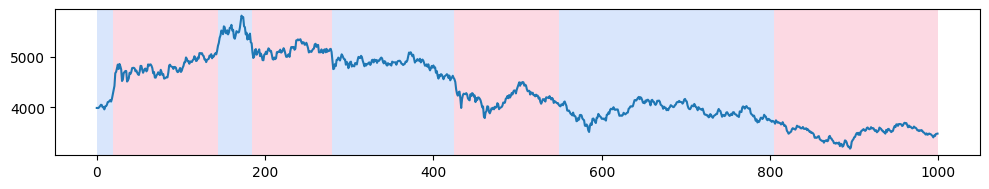

In [67]:
signals = df["CLOSE_INDEX"].to_numpy().astype(float).reshape([-1, 1])[-1000:]
algo = rpt.Pelt(model="rbf").fit(signals)
result = algo.predict(pen=10)
rpt.display(signals, result)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

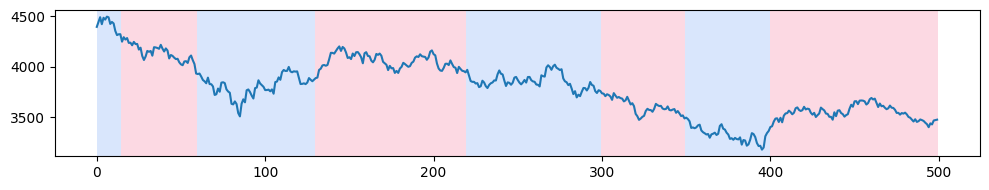

In [68]:
signals = df["CLOSE_INDEX"].to_numpy().astype(float).reshape([-1, 1])[-500:]
algo = rpt.Pelt(model="rbf").fit(signals)
result = algo.predict(pen=10)
rpt.display(signals, result)

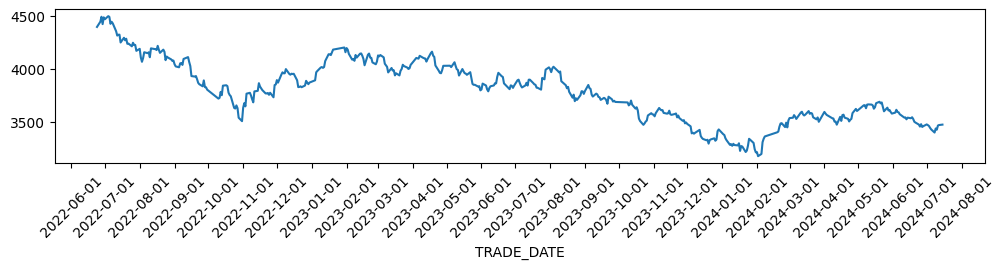

In [69]:
df.set_index("TRADE_DATE")["CLOSE_INDEX"][-500:].astype(float).plot(figsize=(12, 2))

# 设置 x 轴坐标点更多
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=30))
ax.xaxis.set_minor_locator(mdates.AutoDateLocator(maxticks=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

plt.show()